<a href="https://colab.research.google.com/github/bhava534/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shreyash Sunil Jagdale
##### **Team Member 2 -** Shubham Shankar Panaskar
##### **Team Member 3 -** Avinash Vasant Patil
##### **Team Member 4 -** Bhavesh Bhagwan Patil
##### **Team Member 5 -** Paresh Suresh Badgujar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/bhava534/Credit-Card-Default-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import statistics
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV , RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# mount colab to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Projects/credit card/default of credit card clients.csv')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 30001 rows and 25 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f' There are {df.duplicated().sum()} duplicate values in the dataset')

 There are 0 duplicate values in the dataset


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

<Axes: >

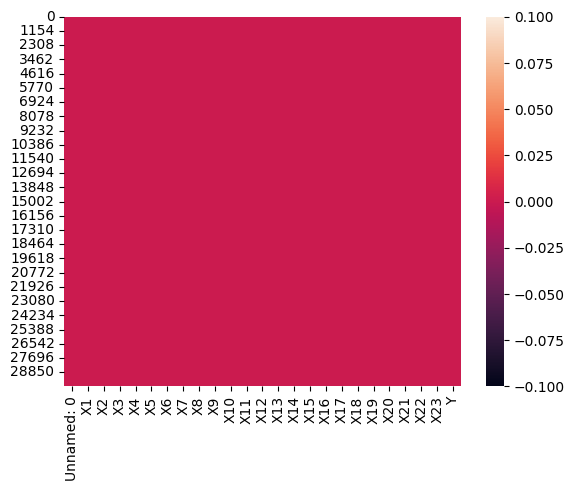

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

<Axes: >

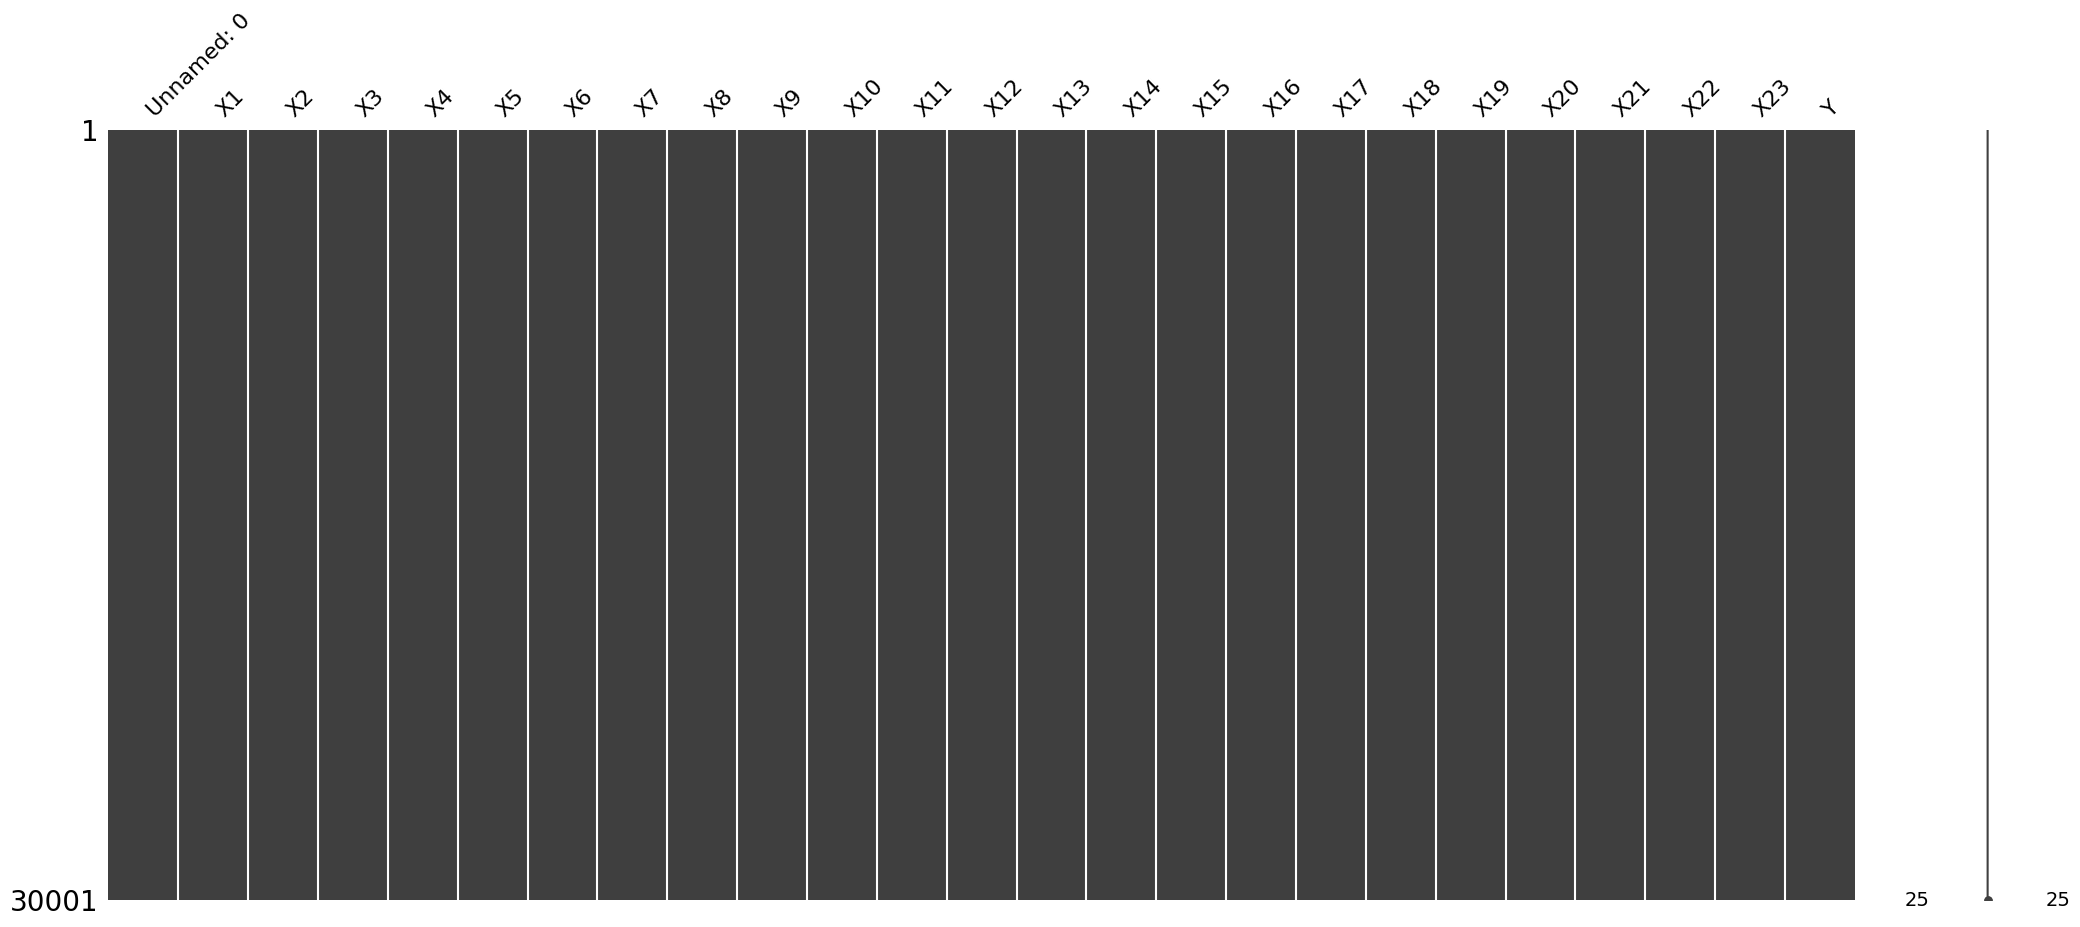

In [ ]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

* Our dataset has 30001 rows and 25 columns
* Datatype of all the variables is object
* There are no duplicate values in the dataset
* No column contain any null or missing value.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
# rename the columns of dataset
column_dict = dict.fromkeys(df.columns ,df.loc[0])
df = df.rename(columns = column_dict['Unnamed: 0'])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# delete first row as it is row of column names
df = df.drop(0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# remove first ID column
df = df.drop(['ID'] , axis = 1)

In [ ]:
# renaming column names with suitable ones
df.rename(columns =
    { 'LIMIT_BAL' : 'Max_credit_given' ,
      'PAY_0' : 'Pay_Status_Sept' ,
      'PAY_2' : 'Pay_Status_Aug' ,
      'PAY_3' : 'Pay_Status_July' ,
      'PAY_4' : 'Pay_Status_June' ,
      'PAY_5' : 'Pay_Status_May' ,
      'PAY_6' : 'Pay_Status_April' ,
      'BILL_AMT1' : 'Bill_Amt_Sept' ,
      'BILL_AMT2' : 'Bill_Amt_Aug' ,
      'BILL_AMT3' : 'Bill_Amt_July' ,
      'BILL_AMT4' : 'Bill_Amt_June' ,
      'BILL_AMT5' : 'Bill_Amt_May' ,
      'BILL_AMT6' : 'Bill_Amt_April' ,
      'PAY_AMT1' : 'Amt_Paid_Sept' ,
      'PAY_AMT2' : 'Amt_Paid_Aug' ,
      'PAY_AMT3' : 'Amt_Paid_July' ,
      'PAY_AMT4' : 'Amt_Paid_June' ,
      'PAY_AMT5' : 'Amt_Paid_May' ,
      'PAY_AMT6' : 'Amt_Paid_April' ,
      'default payment next month' : 'target'

    } ,inplace = True

)

In [ ]:
# list of new column names
df.columns

Index(['Max_credit_given', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Pay_Status_Sept', 'Pay_Status_Aug', 'Pay_Status_July',
       'Pay_Status_June', 'Pay_Status_May', 'Pay_Status_April',
       'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_June',
       'Bill_Amt_May', 'Bill_Amt_April', 'Amt_Paid_Sept', 'Amt_Paid_Aug',
       'Amt_Paid_July', 'Amt_Paid_June', 'Amt_Paid_May', 'Amt_Paid_April',
       'target'],
      dtype='object')

In [ ]:
# convert data type of all the variables to integer
convert_dict = {'Max_credit_given' : int , 'SEX' : int , 'EDUCATION' : int , 'MARRIAGE' : int , 'AGE' : int , 'Pay_Status_Sept' : int ,
       'Pay_Status_Aug' : int , 'Pay_Status_July' : int , 'Pay_Status_June' : int , 'Pay_Status_May' : int , 'Pay_Status_April' : int ,
       'Bill_Amt_Sept' : int , 'Bill_Amt_Aug' : int , 'Bill_Amt_July' : int , 'Bill_Amt_June' : int ,
       'Bill_Amt_May' : int , 'Bill_Amt_April' : int , 'Amt_Paid_Sept' : int , 'Amt_Paid_Aug' : int ,
       'Amt_Paid_July' : int , 'Amt_Paid_June' : int , 'Amt_Paid_May' : int , 'Amt_Paid_April' : int ,
       'target' : int }
df = df.astype(convert_dict)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Max_credit_given  30000 non-null  int64
 1   SEX               30000 non-null  int64
 2   EDUCATION         30000 non-null  int64
 3   MARRIAGE          30000 non-null  int64
 4   AGE               30000 non-null  int64
 5   Pay_Status_Sept   30000 non-null  int64
 6   Pay_Status_Aug    30000 non-null  int64
 7   Pay_Status_July   30000 non-null  int64
 8   Pay_Status_June   30000 non-null  int64
 9   Pay_Status_May    30000 non-null  int64
 10  Pay_Status_April  30000 non-null  int64
 11  Bill_Amt_Sept     30000 non-null  int64
 12  Bill_Amt_Aug      30000 non-null  int64
 13  Bill_Amt_July     30000 non-null  int64
 14  Bill_Amt_June     30000 non-null  int64
 15  Bill_Amt_May      30000 non-null  int64
 16  Bill_Amt_April    30000 non-null  int64
 17  Amt_Paid_Sept     30000 non-nul

In [ ]:
df.head()

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,Pay_Status_May,...,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April,target
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Dataset Describe
df.describe()

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,Pay_Status_May,...,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Max_credit_given       81
SEX                     2
EDUCATION               7
MARRIAGE                4
AGE                    56
Pay_Status_Sept        11
Pay_Status_Aug         11
Pay_Status_July        11
Pay_Status_June        11
Pay_Status_May         10
Pay_Status_April       10
Bill_Amt_Sept       22723
Bill_Amt_Aug        22346
Bill_Amt_July       22026
Bill_Amt_June       21548
Bill_Amt_May        21010
Bill_Amt_April      20604
Amt_Paid_Sept        7943
Amt_Paid_Aug         7899
Amt_Paid_July        7518
Amt_Paid_June        6937
Amt_Paid_May         6897
Amt_Paid_April       6939
target                  2
dtype: int64

### Variable Description

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# make a copy of dataset for some manipulations
df_copy = df.copy()

In [ ]:
# define a function to one hot encode the sex , education and marriage variables

# for sex
def change_sex_values(data):
  if data == 1:
    data = 'Male'
  else:
    data = 'Female'
  return data



In [ ]:
# for eduction
def change_edu_values(data):
  if data == 1:
    data = 'Graduate School'
  elif data == 2:
    data = 'University'
  elif data == 3:
    data = 'High School'
  else:
    data = 'Others'
  return data


In [ ]:
# for marriage
def change_marriage_values(data):
  if data == 1:
    data = 'Married'
  elif data == 2:
    data = 'Single'
  else:
    data = 'Others'
  return data

In [ ]:
# using lambda function to apply defined functions to respective columns
df_copy['SEX'] = df_copy['SEX'].apply(lambda x : change_sex_values(x))
df_copy['EDUCATION'] = df_copy['EDUCATION'].apply(lambda x : change_edu_values(x))
df_copy['MARRIAGE'] = df_copy['MARRIAGE'].apply(lambda x : change_marriage_values(x))

In [ ]:
# count of how many are defualts
target_count = pd.DataFrame(df_copy.target.value_counts())
target_count

,target
0,23364
1,6636


In [ ]:
# count of users by their gender
sex_count = pd.DataFrame(df_copy.SEX.value_counts())
sex_count

,SEX
Female,18112
Male,11888


In [ ]:
# count of users by their education
edu_count =  pd.DataFrame(df_copy.EDUCATION.value_counts())
edu_count

,EDUCATION
University,14030
Graduate School,10585
High School,4917
Others,468


In [ ]:
# count of users by their marital status
marriage_count = pd.DataFrame(df_copy.MARRIAGE.value_counts())
marriage_count

,MARRIAGE
Single,15964
Married,13659
Others,377


In [ ]:
# number of defaults based on their sex
df_copy.groupby(['SEX' , 'target']).size().unstack(1)

target,0,1
SEX,,
Female,14349,3763
Male,9015,2873


In [ ]:
# number of defaults based on their education
df_copy.groupby(['EDUCATION' , 'target']).size().unstack(1)

target,0,1
EDUCATION,,
Graduate School,8549,2036
High School,3680,1237
Others,435,33
University,10700,3330


In [ ]:
# number of defaults based on their marital status
df_copy.groupby(['MARRIAGE' , 'target']).size().unstack(0)

MARRIAGE,Married,Others,Single
target,,,
0,10453,288,12623
1,3206,89,3341


In [ ]:
# get only those variables which are about repayment status
var = ['Pay_Status_Sept', 'Pay_Status_Aug', 'Pay_Status_July',
       'Pay_Status_June', 'Pay_Status_May', 'Pay_Status_April']
pay_status = df_copy[var]
pay_status.head()

,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,Pay_Status_May,Pay_Status_April
1,2,2,-1,-1,-2,-2
2,-1,2,0,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,-1,0,-1,0,0,0


In [ ]:
# get only those variables which are about bill amounts per month
var = ['Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July',
       'Bill_Amt_June', 'Bill_Amt_May', 'Bill_Amt_April']
bill_amt = df_copy[var]
bill_amt.head()

,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_July,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131


In [ ]:
# get only those variables which are about paid bill amounts per month
var = ['Amt_Paid_Sept', 'Amt_Paid_Aug','Amt_Paid_July',
       'Amt_Paid_June', 'Amt_Paid_May', 'Amt_Paid_April']
bill_paid = df_copy[var]
bill_paid.head()

,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April
1,0,689,0,0,0,0
2,0,1000,1000,1000,0,2000
3,1518,1500,1000,1000,1000,5000
4,2000,2019,1200,1100,1069,1000
5,2000,36681,10000,9000,689,679


### What all manipulations have you done and insights you found?

* We have manipulated the original dataset to get some smaller datasets of value counts or totals using groupby function to make data ready to visualize so that we can draw insight.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

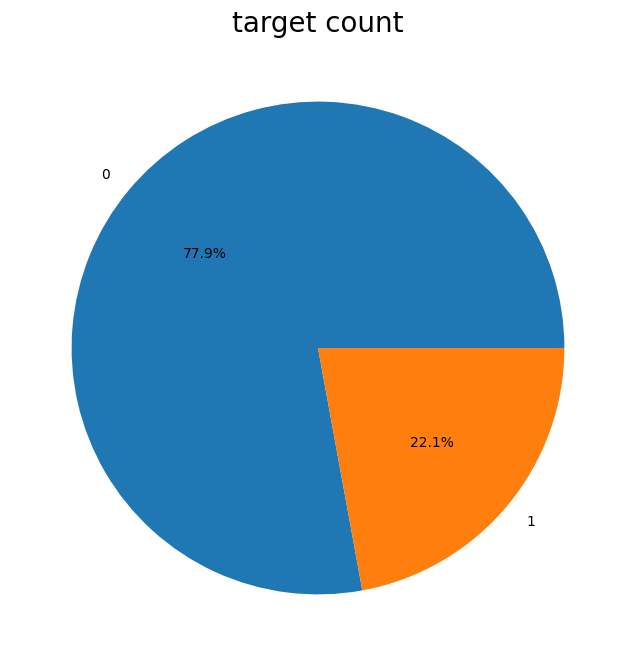

In [ ]:
# visualize the count of target
plt.figure(figsize=(16,8))
plt.pie(df_copy.target.value_counts() , labels = df_copy['target'].value_counts().keys() , autopct='%0.1f%%')
plt.title('target count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion of those who defaulted and who did not we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

* Around 22% of users are defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

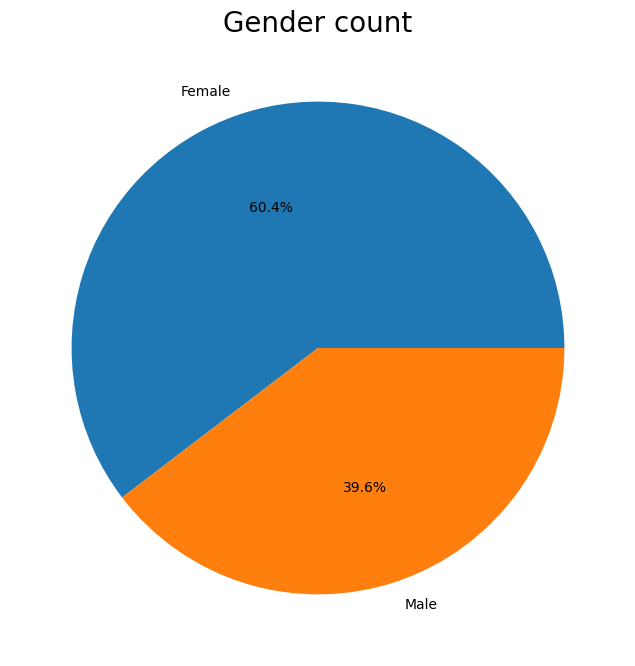

In [ ]:
# visualize the gender count
plt.figure(figsize=(16,8))
plt.pie(df_copy.SEX.value_counts() , labels = df_copy.SEX.value_counts().keys() , autopct = '%0.1f%%' )
plt.title('Gender count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion male and female we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

* 60 % of credit card users are female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* As female users are more in number, we can see if gender plays a role in predicting defaults.

#### Chart - 3

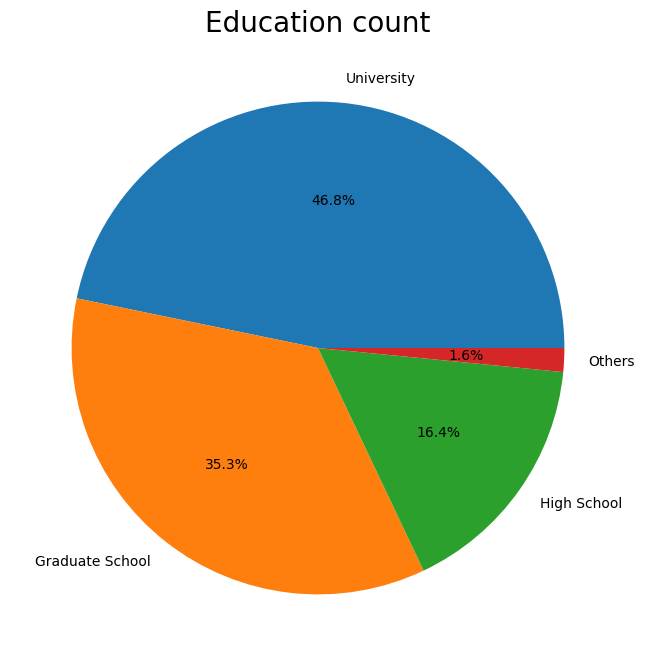

In [ ]:
# visualize the education count
plt.figure(figsize=(16,8))
plt.pie(df_copy.EDUCATION.value_counts() , labels = df_copy.EDUCATION.value_counts().keys() , autopct = '%0.1f%%' )
plt.title('Education count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion of different levels of education of users we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

* Among credit card holders, around 47% of users have completed education till university. While, 35% have done graduate school.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It can be helpful to check whether education level affects the target.

#### Chart - 4

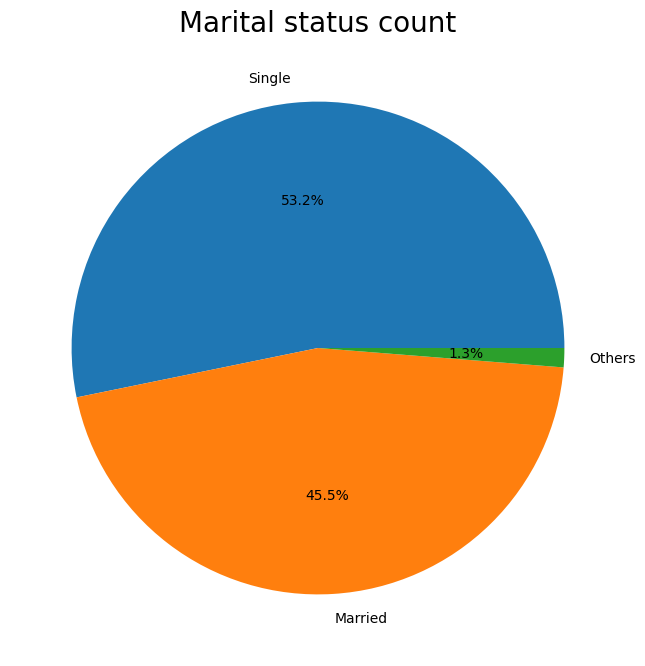

In [ ]:
# visualize the MARUTAL STATUS count
plt.figure(figsize=(16,8))
plt.pie(df_copy.MARRIAGE.value_counts() , labels = df_copy.MARRIAGE.value_counts().keys() , autopct = '%0.1f%%' )
plt.title('Marital status count' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart gives the proportion, divided into slices of circle. Here, to demonstrate the proportion of different marital status of users we used pie chart .

##### 2. What is/are the insight(s) found from the chart?

* Around 53 % of users are single.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It can be helpful to check whether marital status affects the target.

#### Chart - 5

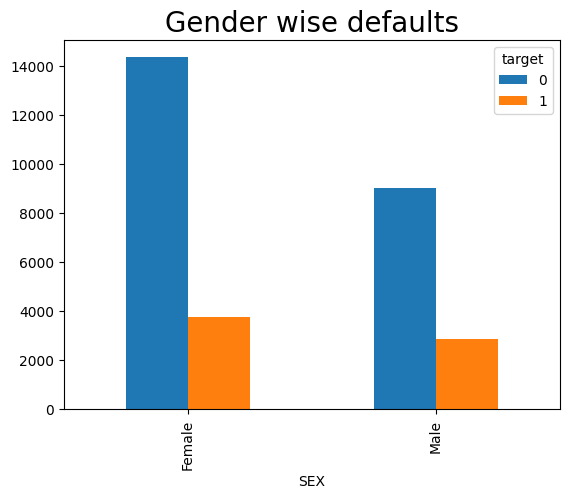

In [ ]:
# visualize the proportion of defaults gender wise
df_copy.groupby(['SEX' , 'target']).size().unstack(1).plot(kind = 'bar')
plt.title('Gender wise defaults' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot gives us counts of the categories of categorical variable on y axis. Here, to compare number of male and female defaulters we used bar chart .

##### 2. What is/are the insight(s) found from the chart?

* Proportion of female defaulters seems less than that of male defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Gender may be important in classification.

#### Chart - 6

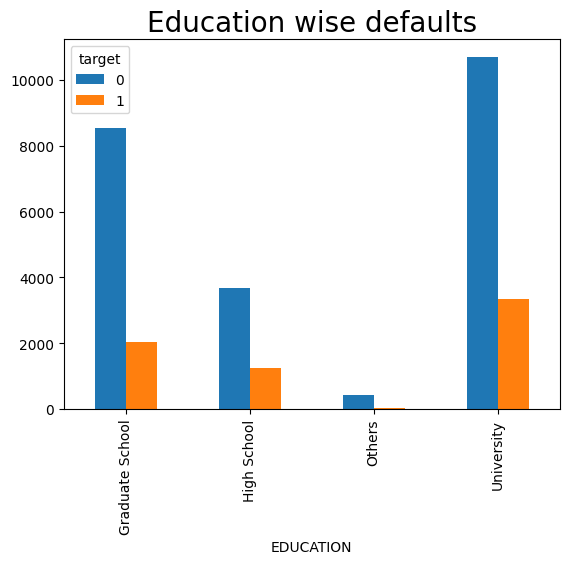

In [ ]:
# visualize the proportion of defaults by their education
df_copy.groupby(['EDUCATION' , 'target']).size().unstack(1).plot(kind = 'bar')
plt.title('Education wise defaults' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot gives us counts of the categories of categorical variable on y axis. Here, to compare number of defaulters by their education level we used bar chart .

##### 2. What is/are the insight(s) found from the chart?

* Here we can see that proportion of university and graduate school defaulters are same but for high school it is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Level of education may be important in classification.

#### Chart - 7

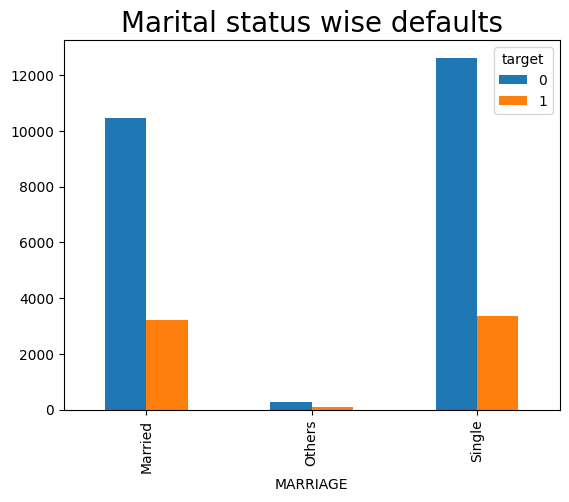

In [ ]:
# visualize the proportion of defaults by their marital status
df_copy.groupby(['MARRIAGE' , 'target']).size().unstack(1).plot(kind = 'bar')
plt.title('Marital status wise defaults' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar plot gives us counts of the categories of categorical variable on y axis. Here, to compare number of defaulters by their marital status we used bar chart .

##### 2. What is/are the insight(s) found from the chart?

* Proportion of married defaulters are more than that of single.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Marital status may be important for classification.

#### Chart - 8

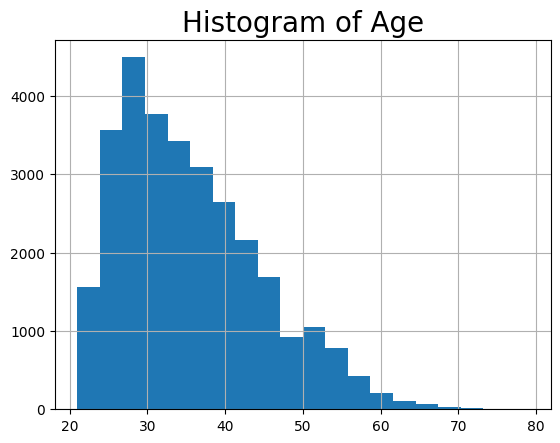

In [ ]:
# visualize the age using histogram
df_copy.AGE.hist(bins = 20)
plt.title('Histogram of Age' , fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram gives the frequency of quantitative variable on the y axis. To visualize how many users belong to patricular age we used histogram

##### 2. What is/are the insight(s) found from the chart?

* Most of the users belong to age between 25 to 45 years of age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It can be helpful to check whether age of user affects the target.

#### Chart - 9

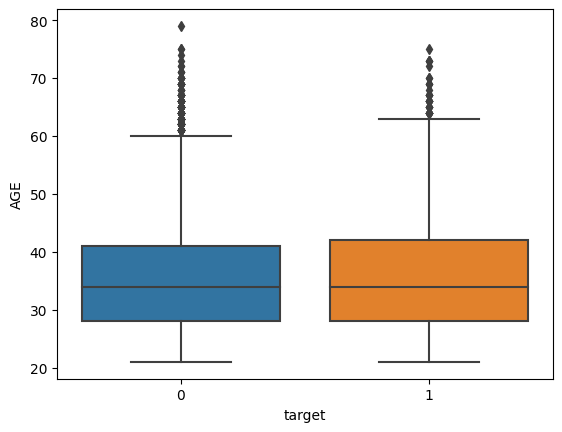

In [ ]:
# visualize defaults by age factor using boxplot
sns.boxplot(y = 'AGE' , x = 'target' , data = df_copy)
plt.show()

##### 1. Why did you pick the specific chart?

* Boxplot displays the five-number summary of a set of data. Here to visualize summary of age of defaulters and non defaulters

##### 2. What is/are the insight(s) found from the chart?

* Mean age of those users who defaulted and those who did not are same.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Age may not be the factor affecting the target in classification.

#### Chart - 10

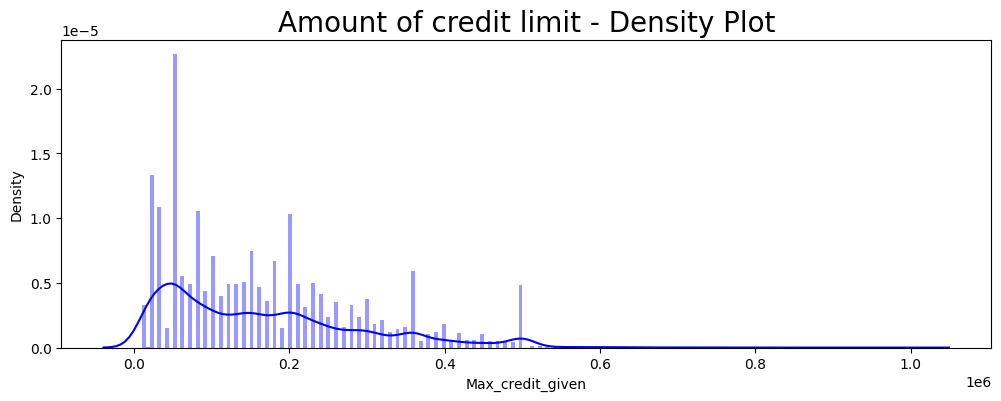

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (12,4))
sns.distplot(df_copy['Max_credit_given'],kde=True,bins=200, color="blue")
plt.title('Amount of credit limit - Density Plot' , fontsize = 20)
plt.show()


##### 1. Why did you pick the specific chart?

* A Distplot or distribution plot depicts the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

* Most of the users have been given credit between 1 lakh to 3 lakh (NT dollar)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

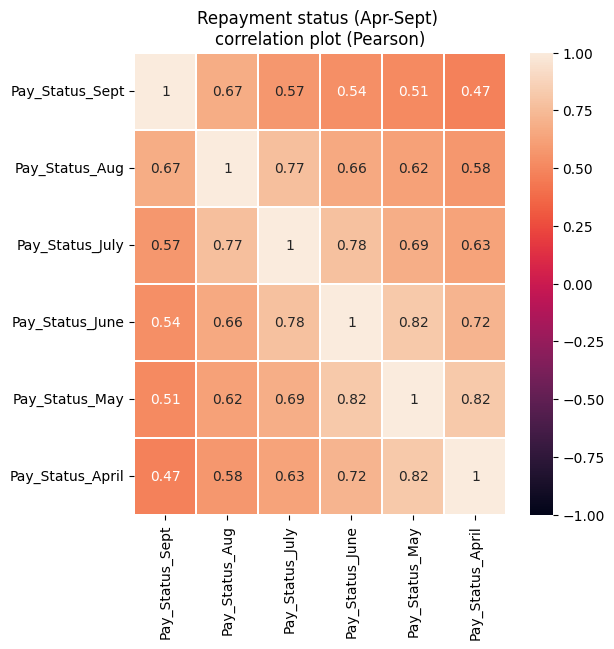

In [ ]:
# get correlation between monthly payment status
plt.figure(figsize = (6,6))
sns.heatmap(pay_status.corr() , linewidths=.1,vmin=-1, vmax=1 , annot = True )
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
plt.show()

##### 1. Why did you pick the specific chart?

* Correlation is the extent to which two variables are linearly related. Correlation heatmap graphically represents such a correlation between different variables. To understand whether there is correlation between repayment status in the adjacent months, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* There is high correltion between the repayment status of just adjacent months. And it decreases as time period between months is increased.  

#### Chart - 12

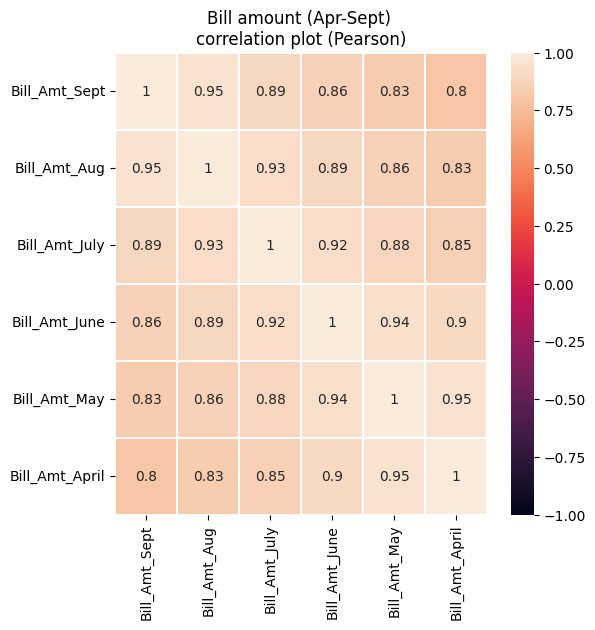

In [ ]:
# get correlation between monthly bill amounts
plt.figure(figsize = (6,6))
sns.heatmap(bill_amt.corr() , linewidths=.1,vmin=-1, vmax=1 , annot = True )
plt.title('Bill amount (Apr-Sept) \ncorrelation plot (Pearson)')
plt.show()

##### 1. Why did you pick the specific chart?

* Correlation is the extent to which two variables are linearly related. Correlation heatmap graphically represents such a correlation between different variables. To understand whether there is correlation between bill amounts in the adjacent months, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* There is high correltion between the bill amounts of just adjacent months. And it decreases as time period between months is increased.  

#### Chart - 13

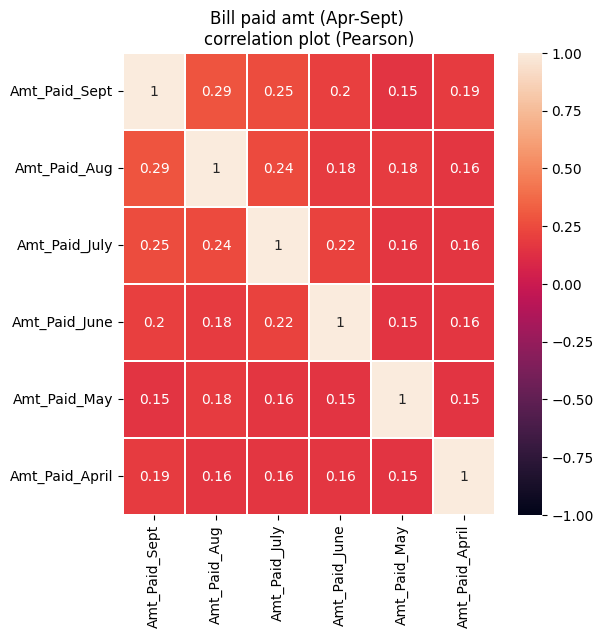

In [ ]:
# get correlation between monthly paid amounts
plt.figure(figsize = (6,6))
sns.heatmap(bill_paid.corr() , linewidths=.1,vmin=-1, vmax=1 , annot = True )
plt.title('Bill paid amt (Apr-Sept) \ncorrelation plot (Pearson)')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation is the extent to which two variables are linearly related. Correlation heatmap graphically represents such a correlation between different variables. To understand whether there is correlation between repayment status in the adjacent months we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* There is no correltion between the bill amounts paid in adjacent months.

#### Chart - 14 - Correlation Heatmap

<Axes: >

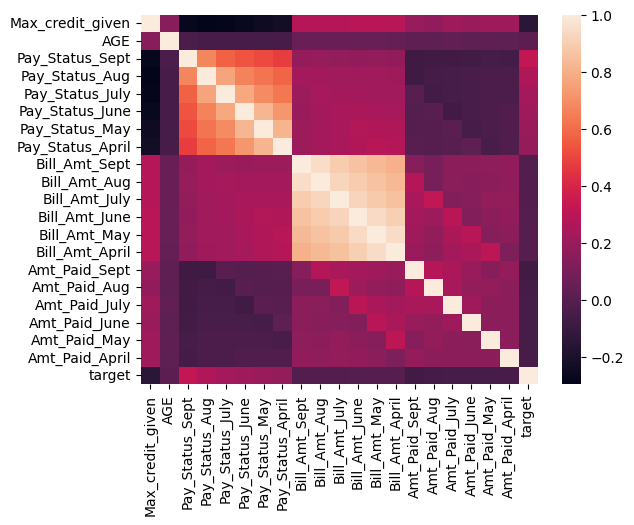

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df_copy.corr())

##### 1. Why did you pick the specific chart?

* Correlation is the extent to which two variables are linearly related. Correlation heatmap graphically represents such a correlation between different variables. To understand the inter relation between the variables, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* There is moderatily high and high correlation between the monthly repayment status and bill amounts respectively. Other variables are not so correlated.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_copy)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot gives multiple pairwise bivariate relationships. To visualize the bivariate relationships of variables in the given dataset we used pairplot.

##### 2. What is/are the insight(s) found from the chart?

* Few variables like monthly repayment status and bill amounts has pairwise relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### 1 Proportion of male defaulters is more than that of female defaulters.
### 2 Proportion of married defaulters is more than that of single defaulters.
### 3 Mean age of defaulters is same as the mean age of non defaulters.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Prop_Male = Prop_Female


Alternative Hypothesis : Prop_Male > Prop_Female

Test type  = Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# get the value count of gender wise defaulters
df_copy[['target' , 'SEX']].groupby(by = 'target').value_counts()

target  SEX   
0       Female    14349
        Male       9015
1       Female     3763
        Male       2873
dtype: int64

In [ ]:
# get total male and female count
df_copy.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

In [ ]:
# perform chi sqaured-test of proportion for two sample
chi_stat , p_val , table = sp.proportions_chisquare(count=[2873 , 3763], nobs=[11888,18112])
print(f'p-value of the given test is {p_val}')

p-value of the given test is 4.472804335813843e-12


##### Which statistical test have you done to obtain P-Value?

* We have used chi-squared test of proportion to obtain P-value and found the result that null hypothesis has been rejected that implies proportion of male defaulters is more than that of female.

##### Why did you choose the specific statistical test?

* As we have categorical variable, we can not use the z-test. So instead we used chi square test of proportion.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Prop_Married = Prop_Single


Alternative Hypothesis : Prop_Married > Prop_single

Test type  = Two Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# get value count of defaulters by their marital status
df_copy[['MARRIAGE' , 'target']].groupby(by = 'target').value_counts()

target  MARRIAGE
0       Single      12623
        Married     10453
        Others        288
1       Single       3341
        Married      3206
        Others         89
dtype: int64

In [ ]:
df_copy.MARRIAGE.value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform chi sqaured-test of proportion for two sample
chi_stat , p_val , table = sp.proportions_chisquare(count=[3206 , 3341], nobs=[13659 , 15964])
print(f'p-value of the given test is {p_val}')

p-value of the given test is 1.4485143429812136e-07


##### Which statistical test have you done to obtain P-Value?

* We have used chi-squared test of proportion to obtain P-value and found the result that null hypothesis has been rejected that implies proportion of married defaulters is more than that of single.

##### Why did you choose the specific statistical test?

* As we have categorical variable, we can not use the z-test. So instead we used chi square test of proportion.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean_age_defaulters = mean_age_non_defaulters


Alternative Hypothesis : mean_age_defaulters =/= mean_age_non_defaulters


Test type  = Two Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# get parameter values for hypothesis testing
alpha = 0.05
defaults = df_copy[df_copy['target'] == 1].AGE
non_defaults = df_copy[df_copy['target'] == 0].AGE
mean_def = defaults.mean()
mean_non_def = non_defaults.mean()
n_1 = len(defaults)
n_2 = len(non_defaults)
var_1 = (statistics.variance(defaults))
var_2 = (statistics.variance(non_defaults))

In [ ]:
# Perform Statistical Test to obtain P-Value
z_calc = (mean_def - mean_non_def)/((var_1 / n_1) + (var_2 / n_2))**0.5
print(z_calc)

2.3195212416592628


In [ ]:
# get critical value at alpha level of significance
z_crit = stats.norm.isf(alpha/2)
print(z_crit)

1.9599639845400545


In [ ]:
# decision
if ((z_calc > z_crit) | (z_calc < (0 - z_crit))):
  print('We reject the null hypothesis')
else:
  print('We fail to reject null hypothesis')

We reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

* We have used Z-test as the statistical testing and found the result that Null hypothesis has been rejected and it implies that mean age of defaulters and the mean age of non defaulters is not same  

##### Why did you choose the specific statistical test?

* For this hypothesis we have a continuous variable age. So, to test the equality of mean we used the Z test of means for two samples.  

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Creating a copy of the dataset for further feature engineering
dataset = df.copy()

In [ ]:
# Handling Missing Values & Missing Value Imputation
# null values count
print(dataset.isnull().sum())

Max_credit_given    0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
Pay_Status_Sept     0
Pay_Status_Aug      0
Pay_Status_July     0
Pay_Status_June     0
Pay_Status_May      0
Pay_Status_April    0
Bill_Amt_Sept       0
Bill_Amt_Aug        0
Bill_Amt_July       0
Bill_Amt_June       0
Bill_Amt_May        0
Bill_Amt_April      0
Amt_Paid_Sept       0
Amt_Paid_Aug        0
Amt_Paid_July       0
Amt_Paid_June       0
Amt_Paid_May        0
Amt_Paid_April      0
target              0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
noncategorical_features = ['Max_credit_given', 'AGE', 'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_June', 'Bill_Amt_May', 'Bill_Amt_April', 'Amt_Paid_Sept', 'Amt_Paid_Aug', 'Amt_Paid_July', 'Amt_Paid_June', 'Amt_Paid_May', 'Amt_Paid_April']
symmetric_feature=[]
non_symmetric_feature=[]
for i in noncategorical_features:
  if abs(dataset[i].mean()-dataset[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)



Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['Max_credit_given', 'AGE', 'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_July', 'Bill_Amt_June', 'Bill_Amt_May', 'Bill_Amt_April', 'Amt_Paid_Sept', 'Amt_Paid_Aug', 'Amt_Paid_July', 'Amt_Paid_June', 'Amt_Paid_May', 'Amt_Paid_April']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  dataset.loc[dataset[feature]<= outlier_treatment_skew(df=dataset,feature=feature)[1], feature]=outlier_treatment_skew(df=dataset,feature=feature)[1]
  dataset.loc[dataset[feature]>= outlier_treatment_skew(df=dataset,feature=feature)[0], feature]=outlier_treatment_skew(df=dataset,feature=feature)[0]

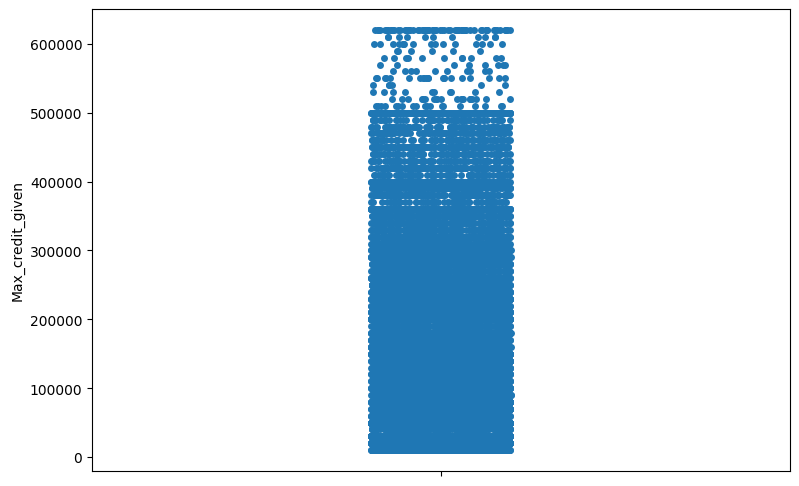

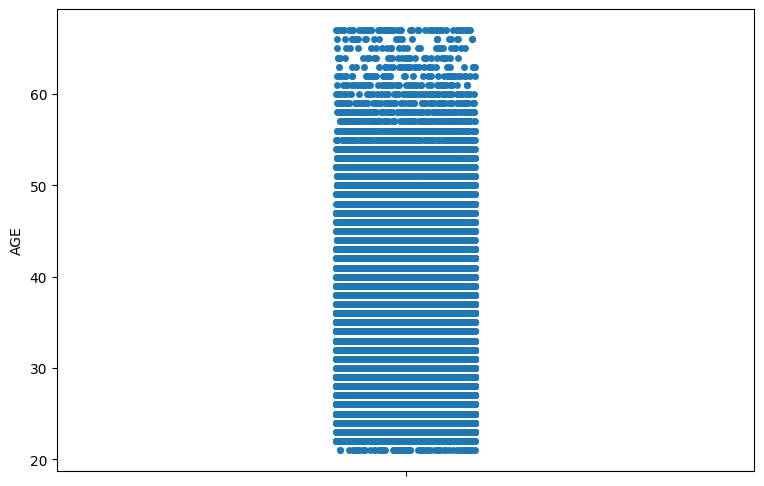

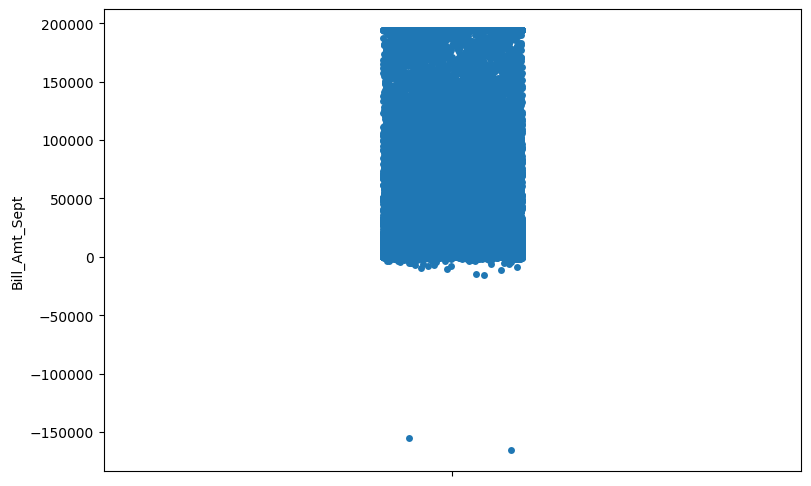

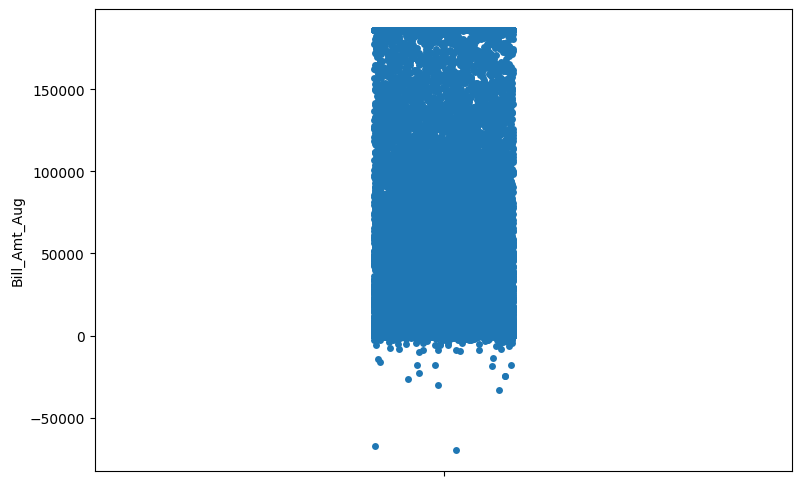

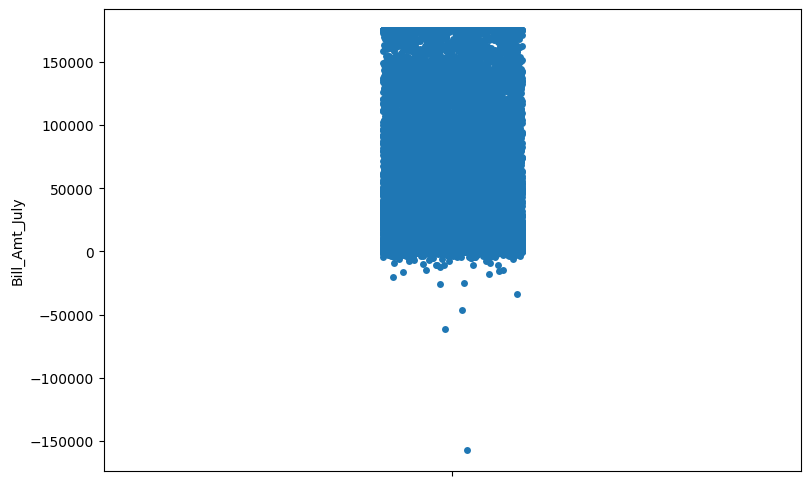

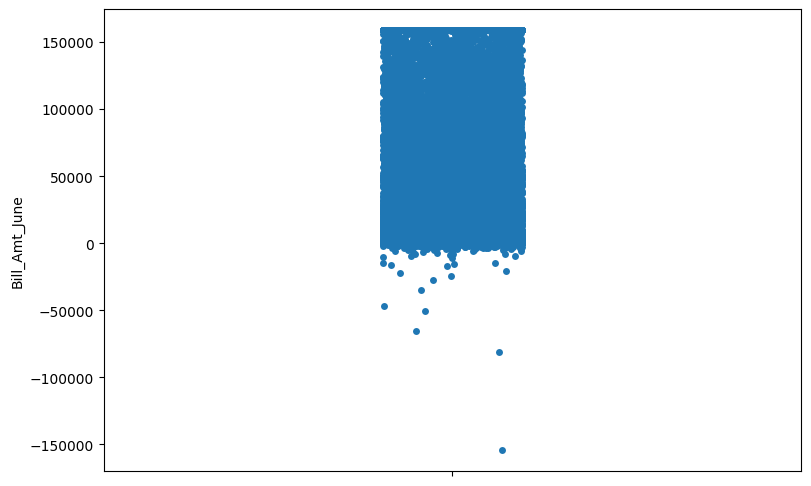

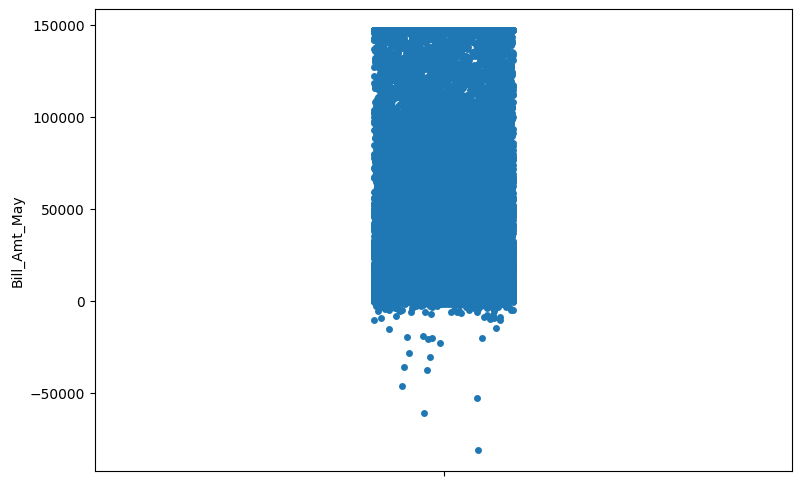

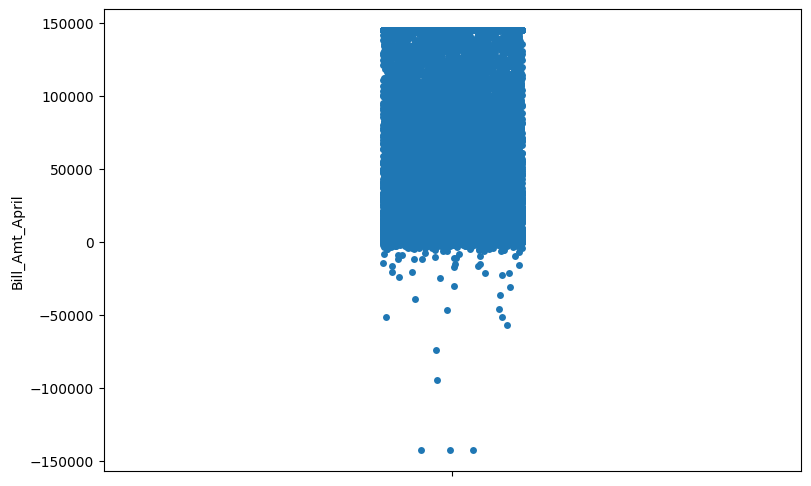

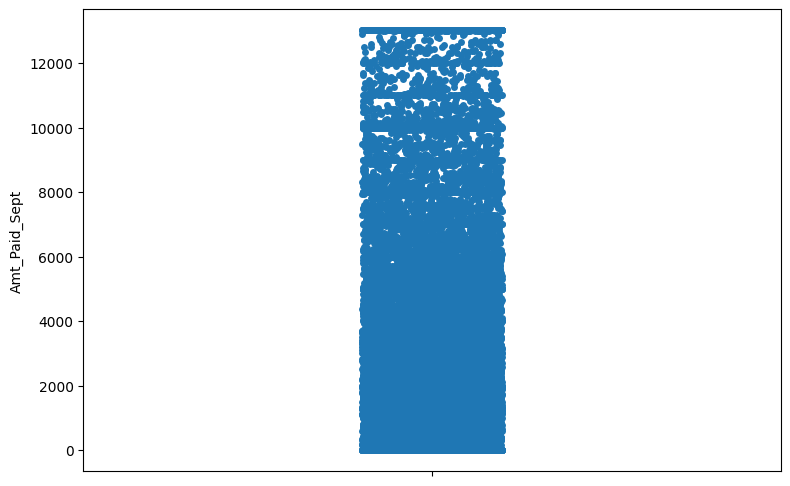

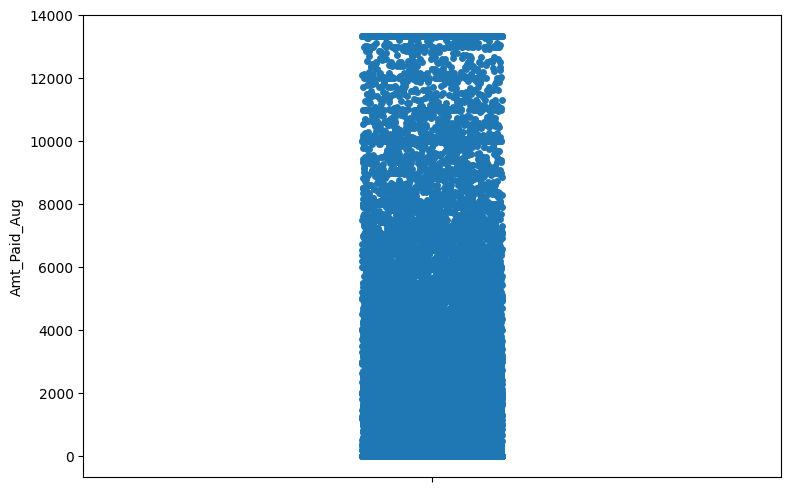

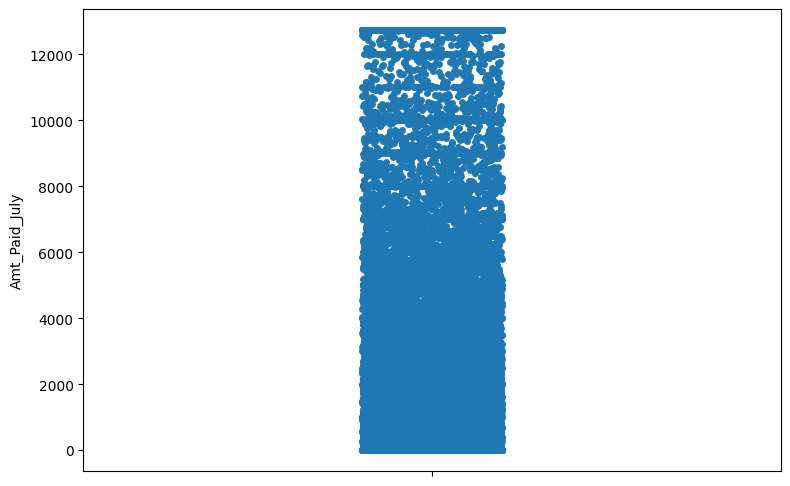

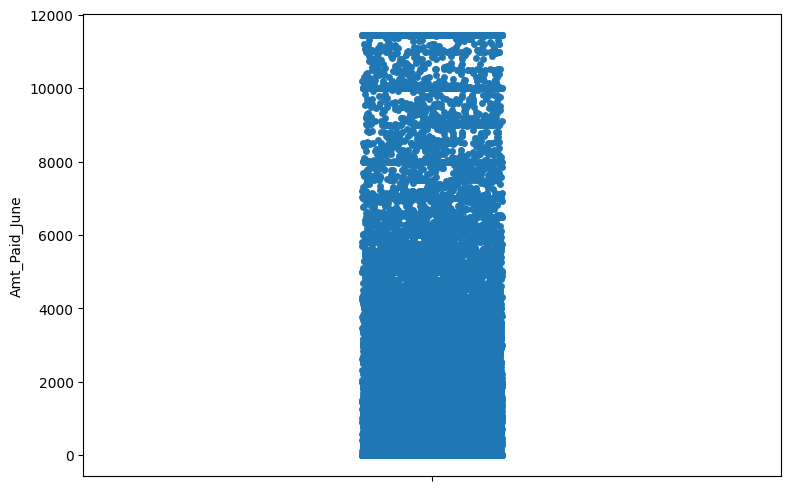

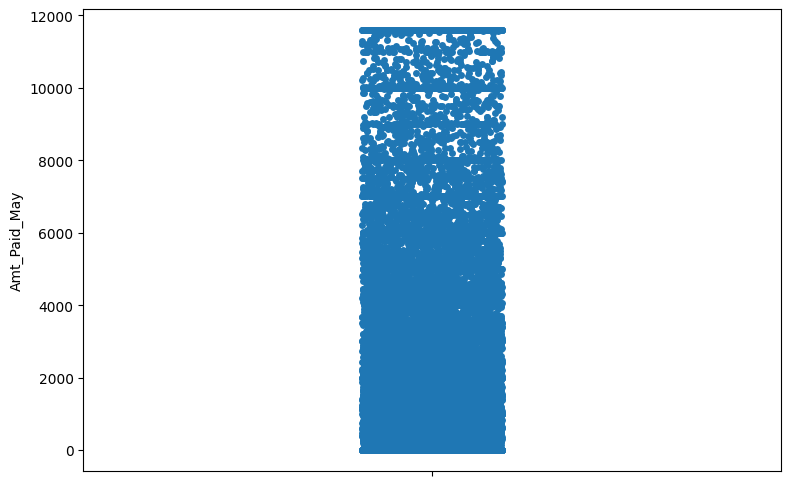

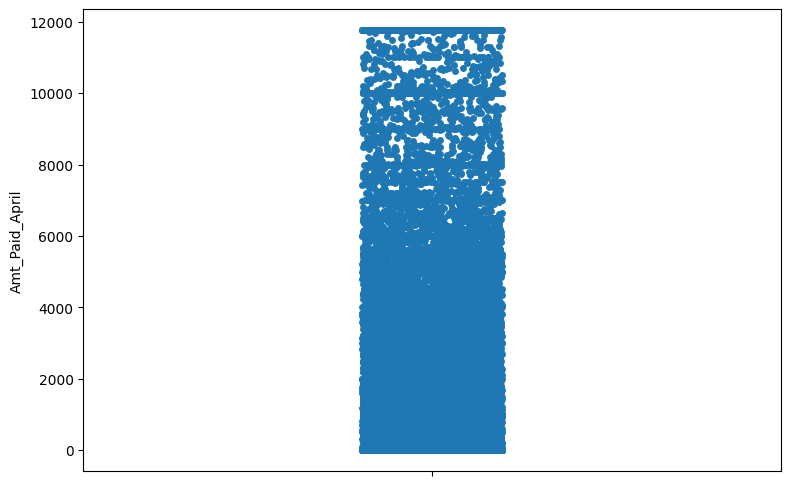

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in non_symmetric_feature:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First we changed the categorical columns to sring as it shouldn't be treated as numerical columns and should be treated as categorical column. Then we separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Again, as it is a classification problem we restrict the both boundaries and we pull down the higher value restricted to the upper limit.

Another way to do it is dropping extreme values but we didn't do that due to less number of datapoints we have.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


### 3. Categorical Encoding

In [ ]:
# convert datatype of some categorical variables again into integer
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Max_credit_given  30000 non-null  int64  
 1   SEX               30000 non-null  int64  
 2   EDUCATION         30000 non-null  int64  
 3   MARRIAGE          30000 non-null  int64  
 4   AGE               30000 non-null  int64  
 5   Pay_Status_Sept   30000 non-null  int64  
 6   Pay_Status_Aug    30000 non-null  int64  
 7   Pay_Status_July   30000 non-null  int64  
 8   Pay_Status_June   30000 non-null  int64  
 9   Pay_Status_May    30000 non-null  int64  
 10  Pay_Status_April  30000 non-null  int64  
 11  Bill_Amt_Sept     30000 non-null  float64
 12  Bill_Amt_Aug      30000 non-null  float64
 13  Bill_Amt_July     30000 non-null  float64
 14  Bill_Amt_June     30000 non-null  float64
 15  Bill_Amt_May      30000 non-null  float64
 16  Bill_Amt_April    30000 non-null  float6

#### What all categorical encoding techniques have you used & why did you use those techniques?

* In our dataset all the categorical columns are already encoded.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

There may not be need to manipulate any features

#### 2. Feature Selection

In [ ]:
# Checking the shape of dataset
dataset.shape

(30000, 24)

In [ ]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]]
  if "target" in concol:
    concol.remove("target")
  else:
    pass
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [ ]:
# Calling the function
df_removed_var=dropping_constant(dataset)

In [ ]:
# shape after features are dropped
df_removed_var.shape

(30000, 24)

In [ ]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Pay_Status_Aug,Pay_Status_July,Pay_Status_June,Pay_Status_May,Pay_Status_April,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_July,Bill_Amt_June,Bill_Amt_May,Bill_Amt_April,Amt_Paid_Sept,Amt_Paid_Aug,Amt_Paid_July,Amt_Paid_June,Amt_Paid_May,Amt_Paid_April,target
Max_credit_given,1.00,0.03,-0.22,-0.11,0.14,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.22,0.22,0.22,0.23,0.23,0.23,0.35,0.36,0.36,0.35,0.36,0.37,-0.15
SEX,0.03,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,-0.04,-0.03,-0.03,-0.02,-0.02,-0.01,-0.01,-0.00,0.01,0.01,0.01,0.01,0.02,-0.04
EDUCATION,-0.22,0.01,1.00,-0.14,0.18,0.11,0.12,0.11,0.11,0.10,0.08,0.04,0.04,0.03,0.02,0.01,0.01,-0.07,-0.07,-0.07,-0.07,-0.08,-0.07,0.03
MARRIAGE,-0.11,-0.03,-0.14,1.00,-0.41,0.02,0.02,0.03,0.03,0.04,0.03,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
AGE,0.14,-0.09,0.18,-0.41,1.00,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,0.04,0.04,0.04,0.03,0.03,0.03,0.04,0.05,0.04,0.05,0.04,0.04,0.01
Pay_Status_Sept,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.22,0.22,0.21,0.21,0.21,0.21,-0.12,-0.12,-0.10,-0.08,-0.07,-0.09,0.32
Pay_Status_Aug,-0.30,-0.07,0.12,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.28,0.28,0.27,0.27,0.26,0.26,-0.09,-0.05,-0.05,-0.03,-0.02,-0.03,0.26
Pay_Status_July,-0.29,-0.07,0.11,0.03,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.25,0.28,0.28,0.28,0.27,0.27,0.07,-0.09,-0.04,-0.02,-0.01,-0.03,0.24
Pay_Status_June,-0.27,-0.06,0.11,0.03,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.24,0.27,0.30,0.30,0.30,0.29,0.04,0.07,-0.06,-0.01,0.01,-0.00,0.22
Pay_Status_May,-0.25,-0.06,0.10,0.04,-0.05,0.51,0.62,0.69,0.82,1.00,0.82,0.25,0.27,0.30,0.33,0.33,0.32,0.04,0.05,0.08,-0.03,0.02,0.02,0.20


In [ ]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)



In [ ]:
# Getting multicolinear columns and dropping them
highly_correlated_columns=correlation(df_removed_var,0.5)

if "target" in highly_correlated_columns:
  highly_correlated_columns.remove("target")
else:
  pass
print(highly_correlated_columns)
df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

['Amt_Paid_April', 'Pay_Status_June', 'Bill_Amt_May', 'Bill_Amt_June', 'Bill_Amt_April', 'Bill_Amt_Aug', 'Amt_Paid_May', 'Amt_Paid_June', 'Amt_Paid_Sept', 'Amt_Paid_July', 'Bill_Amt_July', 'Pay_Status_July', 'Amt_Paid_Aug', 'Pay_Status_April', 'Pay_Status_Aug', 'Pay_Status_May']


(30000, 8)

In [ ]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Bill_Amt_Sept,target
Max_credit_given,1.00,0.03,-0.22,-0.11,0.14,-0.27,0.22,-0.15
SEX,0.03,1.00,0.01,-0.03,-0.09,-0.06,-0.03,-0.04
EDUCATION,-0.22,0.01,1.00,-0.14,0.18,0.11,0.04,0.03
MARRIAGE,-0.11,-0.03,-0.14,1.00,-0.41,0.02,-0.02,-0.02
AGE,0.14,-0.09,0.18,-0.41,1.00,-0.04,0.04,0.01
Pay_Status_Sept,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.22,0.32
Bill_Amt_Sept,0.22,-0.03,0.04,-0.02,0.04,0.22,1.00,-0.03
target,-0.15,-0.04,0.03,-0.02,0.01,0.32,-0.03,1.00


In [ ]:
df_removed.shape

(30000, 8)

##### What all feature selection methods have you used  and why?

We used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

First we dropped columns having constant or quasi constant variance. Then using pearson corelation we removed the columns having multicolinearity

##### Which all features you found important and why?

In [ ]:
df_removed.columns

Index(['Max_credit_given', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Pay_Status_Sept', 'Bill_Amt_Sept', 'target'],
      dtype='object')

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["target"],axis=1),y=df["target"])

,Features,Importances
1,SEX,0.015614
3,MARRIAGE,0.022341
2,EDUCATION,0.039768
0,Max_credit_given,0.166762
5,Pay_Status_Sept,0.192450
4,AGE,0.214008
6,Bill_Amt_Sept,0.349057


Finally we found out 8 indepenedent features which are important and validate their importances through Embedded method using random forest classifier feature importance. All the features which we left with having some importances and none of them are zero. So, It validates that the features make sense and we are heading towards the right direction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
non_symmetric_feature.remove('target')
# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Pay_Status_Sept']
Skew Symmetric Distributed Features : - ['Max_credit_given', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Bill_Amt_Sept']


In [ ]:
# Transform Your data
# Exponential Transforming the required column
df_removed['Max_credit_given']=(df_removed['Max_credit_given'])**0.25
df_removed['SEX']=(df_removed['SEX'])**0.25
df_removed['AGE']=(df_removed['AGE'])**0.25
df_removed['EDUCATION']=(df_removed['EDUCATION'])**0.25
df_removed['MARRIAGE']=(df_removed['MARRIAGE'])**0.25

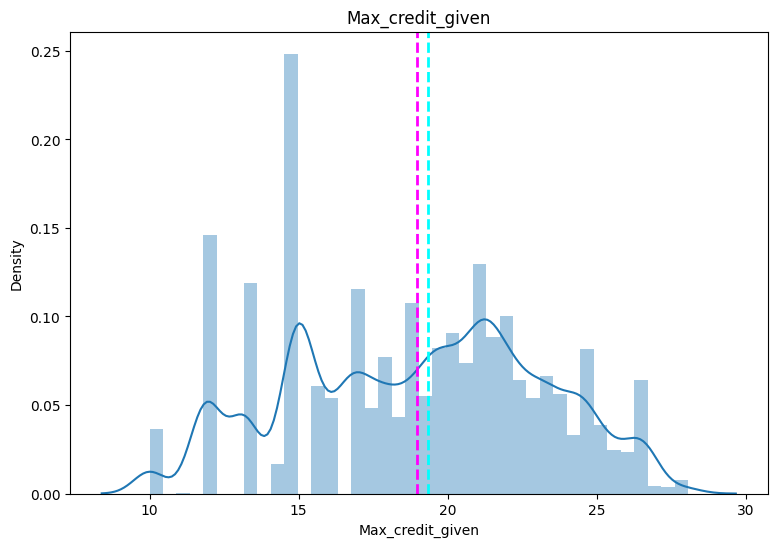

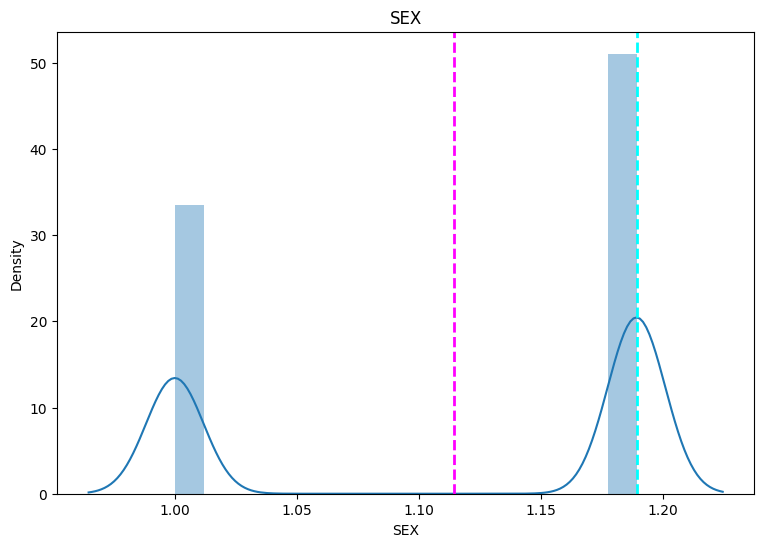

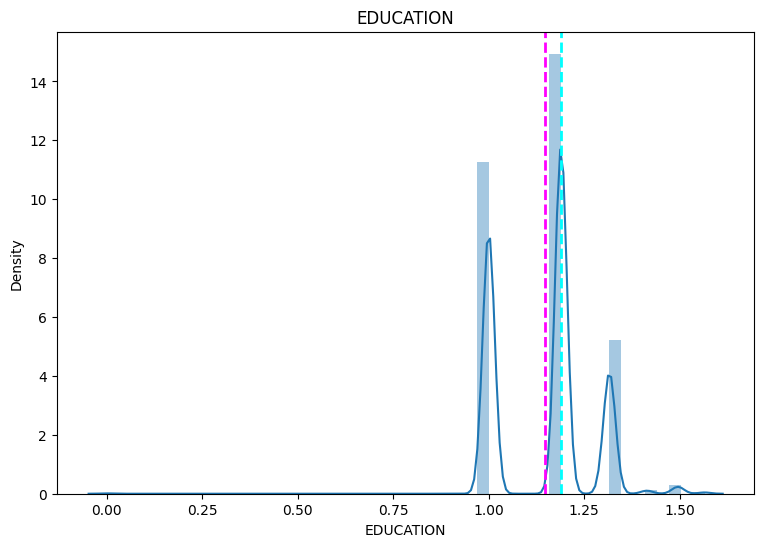

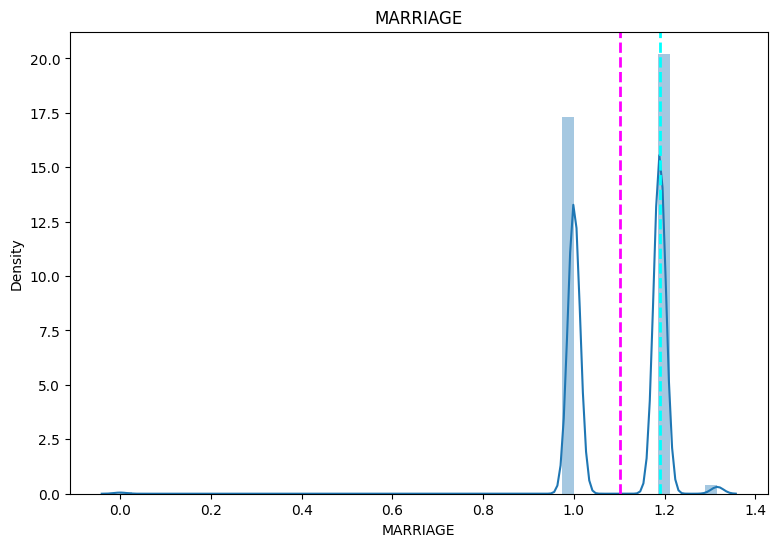

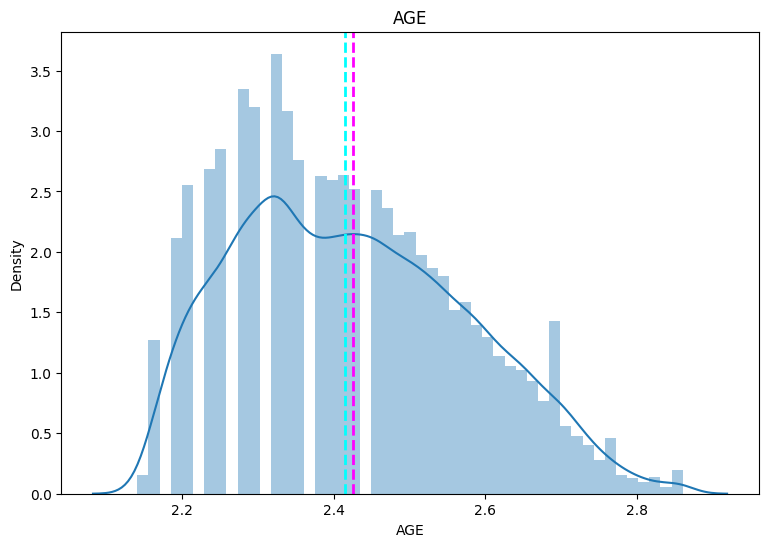

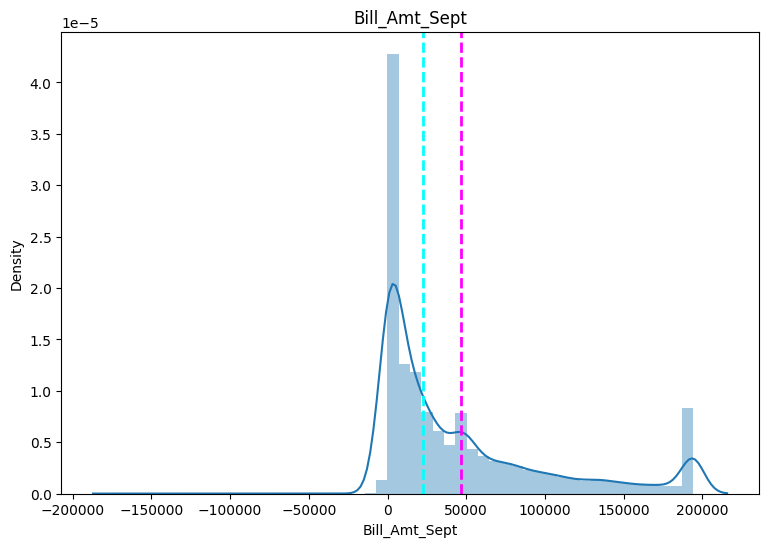

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in df_removed.loc[:,non_symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

From the features, I got to know that all the features which aren't symmetric so aren't following gaussian distribution. Thus, for those columns I have used Exponential transformation to achieve gaussian distribution.

 I tried with other transformations and found exponetial tranformation with no infinity value and working fine. So, I am continuing with Exponential transformation with a power of 0.25.


### 6. Data Scaling

In [ ]:
# checking dataset
df_removed.head()

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Bill_Amt_Sept,target
1,11.892071,1.189207,1.189207,1.000000,2.213364,2,3913.0,1
2,18.612097,1.189207,1.189207,1.189207,2.258101,-1,2682.0,1
3,17.320508,1.189207,1.189207,1.189207,2.414736,0,29239.0,0
4,14.953488,1.189207,1.189207,1.000000,2.466326,0,46990.0,0
5,14.953488,1.000000,1.189207,1.000000,2.747696,-1,8617.0,0


In [ ]:
# Scaling your data
df_removed[["Max_credit_given" , "Bill_Amt_Sept" , "AGE"]] = StandardScaler().fit_transform(df_removed[["Max_credit_given" , "Bill_Amt_Sept" , "AGE"]])

In [ ]:
df_removed.head()

,Max_credit_given,SEX,EDUCATION,MARRIAGE,AGE,Pay_Status_Sept,Bill_Amt_Sept,target
1,-1.680132,1.189207,1.189207,1.000000,-1.383994,2,-0.752083,1
2,-0.082037,1.189207,1.189207,1.189207,-1.092690,-1,-0.773866,1
3,-0.389191,1.189207,1.189207,1.189207,-0.072760,0,-0.303933,0
4,-0.952094,1.189207,1.189207,1.000000,0.263163,0,0.010175,0
5,-0.952094,1.000000,1.189207,1.000000,2.095302,-1,-0.668845,0


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

### 8. Data Splitting

In [ ]:
# Split your data to train and test.
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(df_removed.drop("target",axis=1),df_removed["target"], test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 7)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9000, 7)
Number transactions y_test dataset:  (9000,)


##### What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 9. Handling Imbalanced Dataset

0    23364
1     6636
Name: target, dtype: int64
 


<Axes: ylabel='target'>

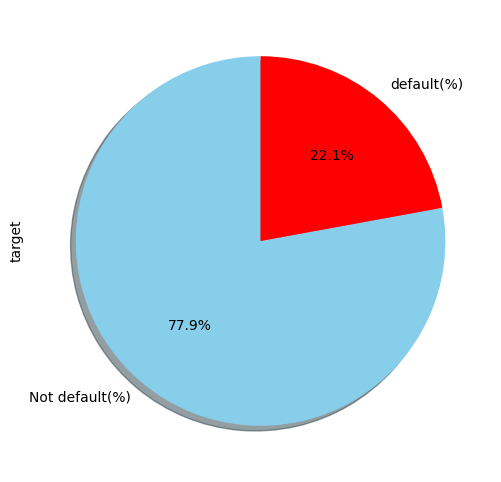

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(dataset.target.value_counts())
print(" ")
# Dependant Variable Column Visualization
dataset['target'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not default(%)','default(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 78:22. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32608, 7)
Number transactions y_train dataset:  (32608,)
Number transactions X_test dataset:  (9000, 7)
Number transactions y_test dataset:  (9000,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 78:22 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
clf.coef_

array([[-0.22369761, -0.64917239, -0.67518007, -0.79408884,  0.08017542,
         0.62827875, -0.17547886]])

In [ ]:
# Checking the intercept value
clf.intercept_

array([2.21843954])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6691609421000981
The accuracy on test data is  0.6931111111111111


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[5006 2054]
 [ 708 1232]]


[Text(0, 0.5, 'Not Default'), Text(0, 1.5, 'Default')]

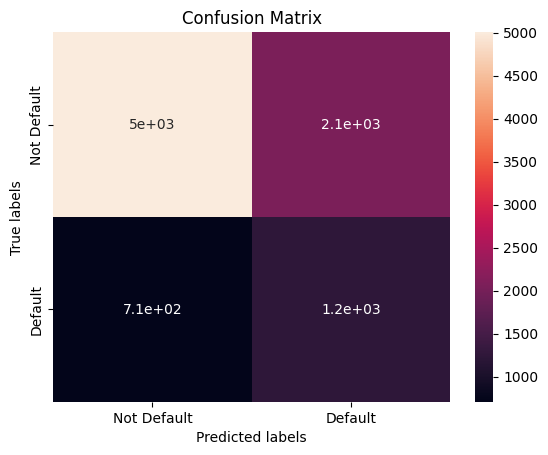

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix

labels = ['Not Default', 'Default']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68     17536
           1       0.63      0.68      0.66     15072

    accuracy                           0.67     32608
   macro avg       0.67      0.67      0.67     32608
weighted avg       0.67      0.67      0.67     32608

 
roc_auc_score
0.669160942100098


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      5714
           1       0.64      0.37      0.47      3286

    accuracy                           0.69      9000
   macro avg       0.67      0.63      0.63      9000
weighted avg       0.68      0.69      0.67      9000

 
roc_auc_score
0.672058351099559


I used Logistic regression algorithm to create the model. As I got not so good result.

For training dataset, I found precision of 71% and recall of 66% and f1-score of 68% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 63% and recall of 68% and f1-score of 66%. Accuracy is 67% and average percision, recall & f1_score are 67%, 67% and 67% respectively with a roc auc score of 66.9%.

For testing dataset, i found precision of 71% and recall of 88% and f1-score of 78% for not defaulting customer data. BUt, I am also interested to see the result for defaulting cutomer result as I got precision of 64% and recall of 37% and f1-score of 47%. Accuracy is 69% and average percision, recall & f1_score are 68%, 69% and 67% respectively with a roc auc score of 67.2%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001,0.0001,0.00001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.662369 using {'C': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67     16744
           1       0.65      0.67      0.66     15864

    accuracy                           0.67     32608
   macro avg       0.67      0.67      0.67     32608
weighted avg       0.67      0.67      0.67     32608

 
roc_auc_score
0.6670755642787046


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      5503
           1       0.66      0.37      0.47      3497

    accuracy                           0.68      9000
   macro avg       0.67      0.62      0.62      9000
weighted avg       0.68      0.68      0.66      9000

 
roc_auc_score
0.6741997897257674


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 71% and recall of 66% and f1-score of 68% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 63% and recall of 68% and f1-score of 66%. Accuracy is 67% and average percision, recall & f1_score are 67%, 67% and 67% respectively with a roc auc score of 67%.

Quite improvment seen in precsion, f1 score,accuracy and roc auc score for training dataset of 1%.

For testing dataset, i found precision of 71% and recall of 88% and f1-score of 78% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 64% and recall of 37% and f1-score of 47%. Accuracy is 69% and average percision, recall & f1_score are 68%, 69% and 67% respectively with a roc auc score of 67.4%.

Quite improvemnt seen in precsion, f1 score and roc auc of 1% but 1% decrement in recall.



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9978839548577036
The accuracy on test dataset is 0.7865555555555556


[[16275    29]
 [   40 16264]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

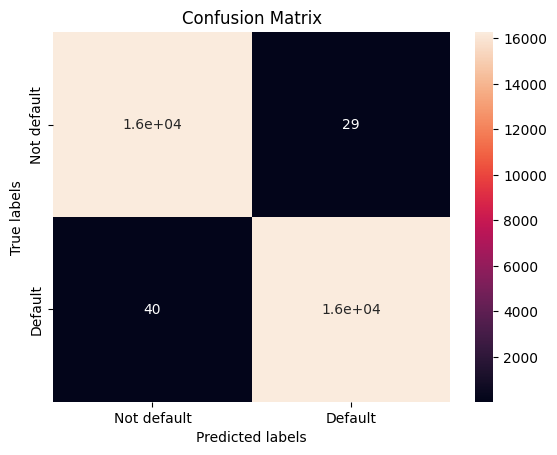

In [ ]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not default', 'Default']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6288  772]
 [1149  791]]


[Text(0, 0.5, 'Not Default'), Text(0, 1.5, 'Default')]

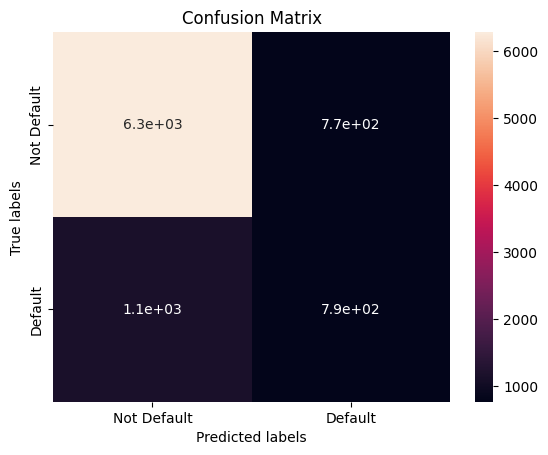

In [ ]:
labels = ['Not Default', 'Default']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16315
           1       1.00      1.00      1.00     16293

    accuracy                           1.00     32608
   macro avg       1.00      1.00      1.00     32608
weighted avg       1.00      1.00      1.00     32608

 
roc_auc_score
0.9978839548577036


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7437
           1       0.41      0.51      0.45      1563

    accuracy                           0.79      9000
   macro avg       0.65      0.68      0.66      9000
weighted avg       0.81      0.79      0.80      9000

 
roc_auc_score
0.6491917584182704


Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. But, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 99.7%.

For testing dataset, i found precision of 89% and recall of 58% and f1-score of 87% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 41% and recall of 51% and f1-score of 45%. Accuracy is 79% and average percision, recall & f1_score are 81%, 79% and 80% respectively with a roc auc score of 65%.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.776023 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


[[14506  1798]
 [ 4386 11918]]


[Text(0, 0.5, 'Not Defaluting'), Text(0, 1.5, 'Defaulting')]

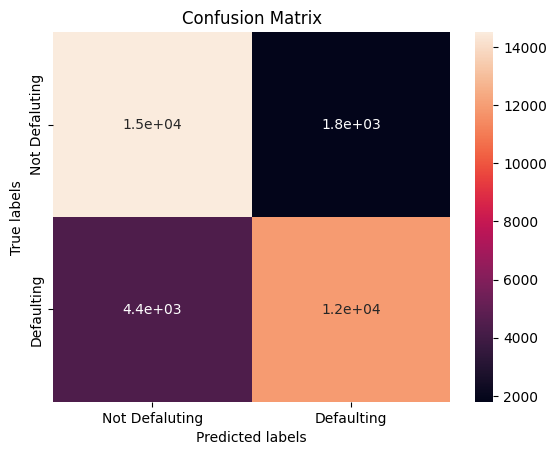

In [ ]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not Defaluting', 'Defaulting']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6298  762]
 [1020  920]]


[Text(0, 0.5, 'Not Defaluting'), Text(0, 1.5, 'Defaulting')]

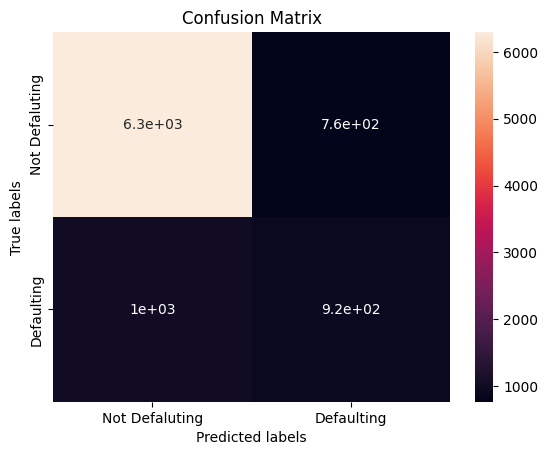

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaluting', 'Defaulting']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82     18892
           1       0.73      0.87      0.79     13716

    accuracy                           0.81     32608
   macro avg       0.81      0.82      0.81     32608
weighted avg       0.82      0.81      0.81     32608

 
roc_auc_score
0.8103532875368008


In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      7318
           1       0.47      0.55      0.51      1682

    accuracy                           0.80      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.81      0.80      0.81      9000

 
roc_auc_score
0.6831473963961333


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 89% and recall of 77% and f1-score of 82% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 73% and recall of 87% and f1-score of 79%. Accuracy is 81% and average percision, recall & f1_score are 82%, 81% and 81% respectively with a roc auc score of 81%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 90% and recall of 86% and f1-score of 88% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 47% and recall of 55% and f1-score of 51%. Accuracy is 80% and average percision, recall & f1_score are 82%, 81% and 80% respectively with a roc auc score of 68%.

Quite improvemnt seen in precision , recall and f1_score by around 1 to 3%.


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[15574   730]
 [ 2940 13364]]


[Text(0, 0.5, 'Not Defaluting'), Text(0, 1.5, 'Defaulting')]

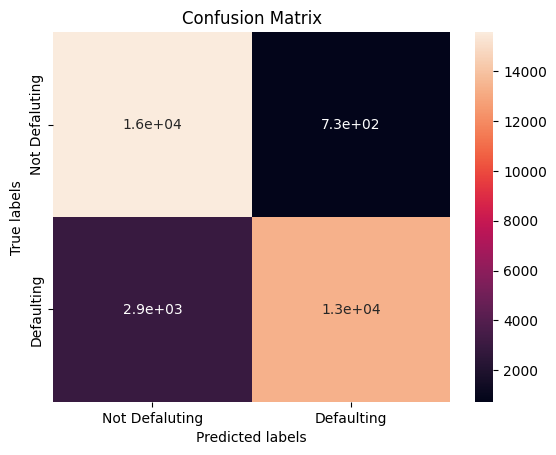

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not Defaluting', 'Defaulting']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6640  420]
 [1213  727]]


[Text(0, 0.5, 'Not Defaluting'), Text(0, 1.5, 'Defaulting')]

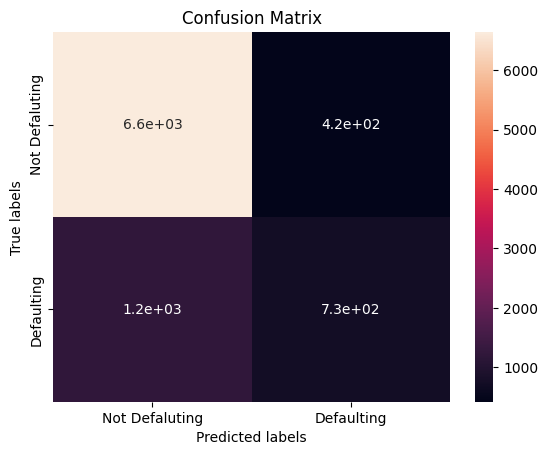

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaluting', 'Defaulting']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89     18514
           1       0.82      0.95      0.88     14094

    accuracy                           0.89     32608
   macro avg       0.89      0.89      0.89     32608
weighted avg       0.90      0.89      0.89     32608

 
roc_auc_score
0.8874509322865555


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7853
           1       0.37      0.63      0.47      1147

    accuracy                           0.82      9000
   macro avg       0.66      0.74      0.68      9000
weighted avg       0.87      0.82      0.84      9000

 
roc_auc_score
0.6576260915277007


Then, I used XGBoost algorithm to create the model. As I got there  good result.

For training dataset, i found precision of 96% and recall of 84% and f1-score of 89% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 82% and recall of 95% and f1-score of 88%. Accuracy is 89% and average percision, recall & f1_score are 90%, 89% and 89% respectively with a roc auc score of 88%.

For testing dataset, i found precision of 94% and recall of 85% and f1-score of 89% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 37% and recall of 63% and f1-score of 47%. Accuracy is 82% and average percision, recall & f1_score are 87%, 82% and 84% respectively with a roc auc score of 66%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,SEX,0.28
5,Pay_Status_Sept,0.23
2,EDUCATION,0.21
3,MARRIAGE,0.16
0,Max_credit_given,0.05
4,AGE,0.04
6,Bill_Amt_Sept,0.02


In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

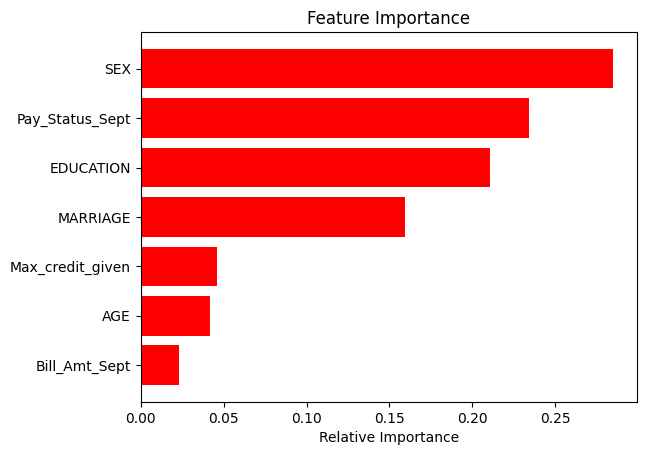

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[10:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[10:25:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[10:25:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[10:25:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[10:25:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.923335 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


[[15768   536]
 [ 2507 13797]]


[Text(0, 0.5, 'Not Defaluting'), Text(0, 1.5, 'Defaulting')]

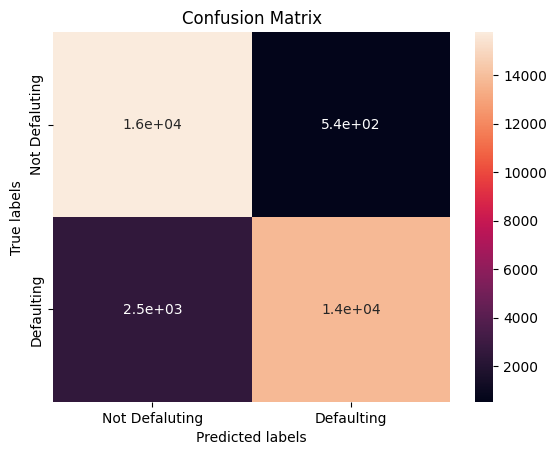

In [ ]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not Defaluting', 'Defaulting']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[6575  485]
 [1230  710]]


[Text(0, 0.5, 'Not Defaluting'), Text(0, 1.5, 'Defaulting')]

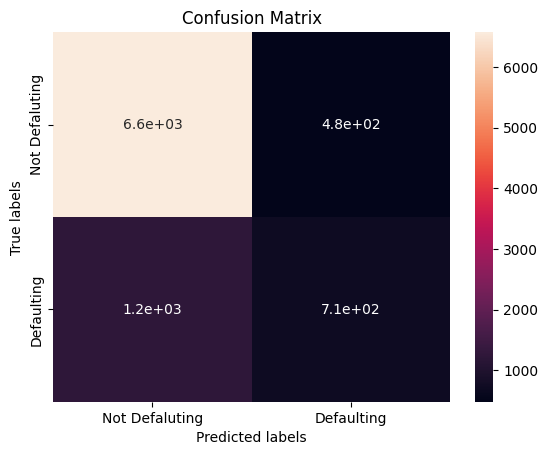

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaluting', 'Defaulting']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#Hyperparameter tuned xgboost model
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     18275
           1       0.85      0.96      0.90     14333

    accuracy                           0.91     32608
   macro avg       0.91      0.91      0.91     32608
weighted avg       0.91      0.91      0.91     32608

 
roc_auc_score
0.9066793424926398


In [ ]:
#Hyperparameter tuned xgboost model
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7805
           1       0.37      0.59      0.45      1195

    accuracy                           0.81      9000
   macro avg       0.65      0.72      0.67      9000
weighted avg       0.86      0.81      0.83      9000

 
roc_auc_score
0.6486412487953039


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 97% and recall of 86% and f1-score of 91% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 85% and recall of 96% and f1-score of 90%. Accuracy is 92% and average percision, recall & f1_score are 91%, 91% and 91% respectively with a roc auc score of 90%.

No improvement or decreament every score is constant as earlier.

For testing dataset, i found precision of 93% and recall of 84% and f1-score of 88% for not defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 37% and recall of 59% and f1-score of 45%. Accuracy is 81% and average percision, recall & f1_score are 86%, 81% and 83% respectively with a roc auc score of 65%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score by 1%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall and Precision and which describes both is F1 Score.

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will default but the customer didn't default. But according to our model it will default so, there would be quite chance of his defaulting not for immediate but after some times. Again false negative defines as model will predict that the customer won't default but the customer really default. That will be an issue for us. So, for that case we have to minimize the false negative and false positive we must improve the score of both precision as well as recall which should direclt affect the f1_score positively. So, in our case recall will stand the higher but precision can't be neglected. So, ***recall should be higher and f1_score should be moderate.***

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. First of all I need accuracy for the default prediction. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost kind of ensembel techniques. So, I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.


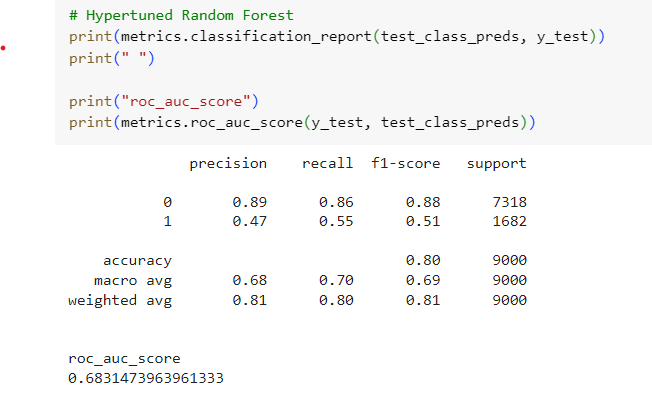


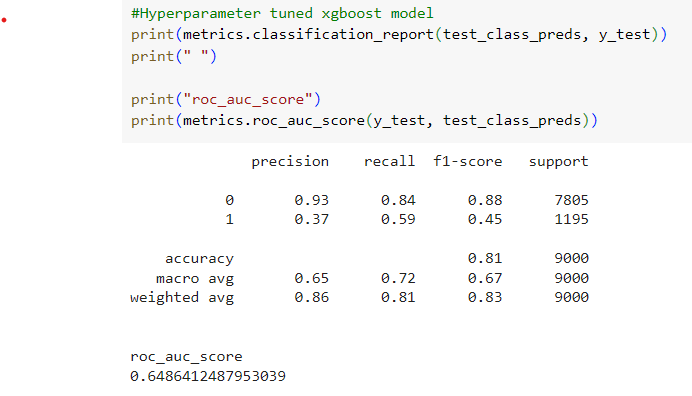




From the above snap shot, we can clearly see that for XGBoost has a improved score of f1_score over random forest. the accuracy is also improved for xg boost.
So, I have chosen XGBoost as the final prdiction model which should be deployed.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)

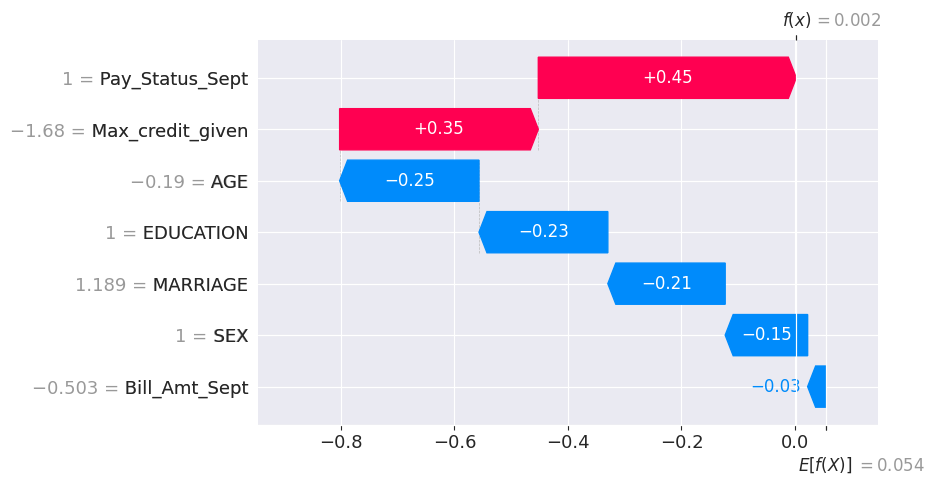

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = 0.054. This is the average predicted number of rings across all 2967 abalones. The ending value is f(x) = 0.002. This is the predicted target type for this abalone. The SHAP values are all the values in between.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress. you can see we start at the same base value of 0.054.

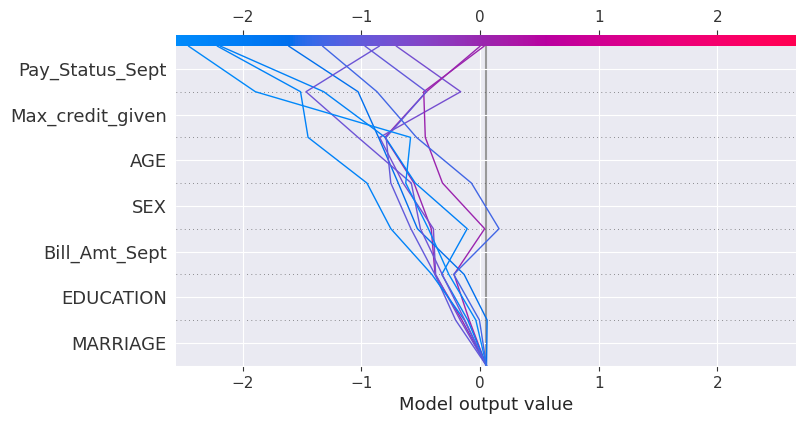

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is using a decision plot. Above we have the code used to output the decision plot for the first 10 abalones.

we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value of 0.054 and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations.

With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, the shucked weight increases the prediction (i.e. positive SHAP) and the shell weight and whole weight decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction. When we look at plot 5 — beeswarm, we will see that this is the case for the model in general.

An issue with this chart is that we can’t use it to visualise all the SHAP values at once. As you increase the number of observations it will become too cluttered and it will be difficult to gain any understanding of how the model works. We are limited to interpreting the SHAP values for a handful of observations.

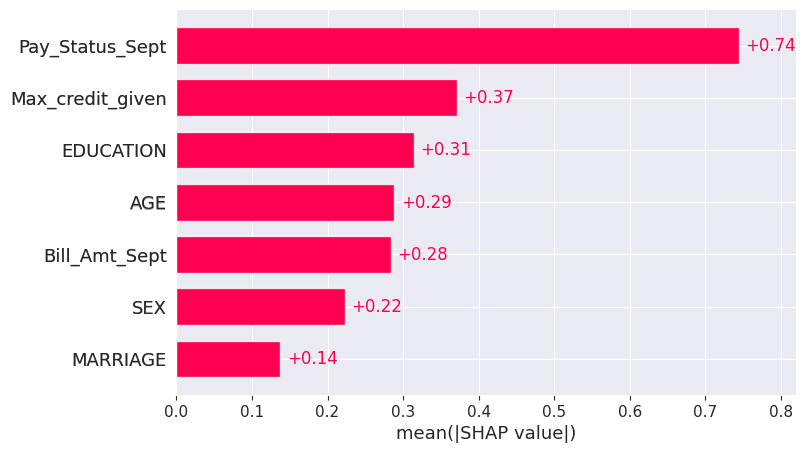

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to aggregate the values is using a mean SHAP plot. For each feature, we calculate the mean of the absolute SHAP values across all observations. We take the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot above. There is one bar for each feature and we can see that shell weight had the largest mean SHAP out of all the features.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot. That is to highlight features that are important to a model’s predictions. An issue is that it does not tell us anything about the nature of the relationship between features and the target variable.



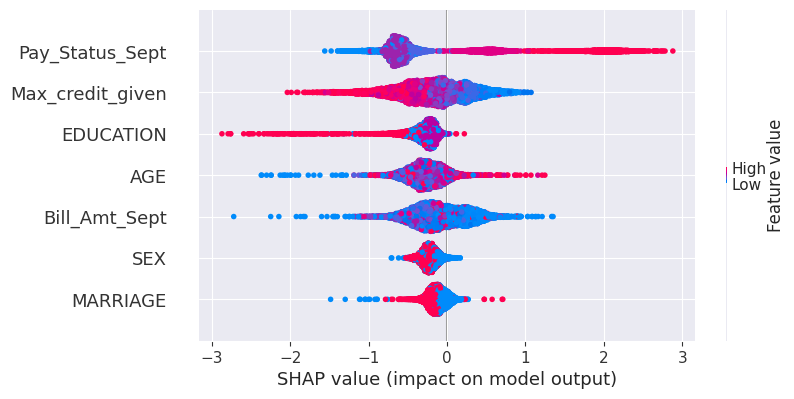

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are redder). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships.

# **Conclusion**

1. We can deploy the model with XGBoost algorithm. Because For testing dataset, I found precision of 93% and recall of 84% and f1-score of 88% for defaulting customer data. But, I am also interested to see the result for defaulting cutomer result as I got precision of 37% and recall of 59% and f1-score of 45%. Accuracy is 81% and average percision, recall & f1_score are 86%, 81% and 83% respectively with a roc auc score of 65%. It's the best performing model I found.

2. No overfitting is seen.

3. Due to less no. of data in the dataset, the scores are around 81%. Once we get more data we can retrain our algorithm for better performance.